<a href="https://colab.research.google.com/github/dandi462002/hactive-dandi8/blob/main/classification_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain_community
!pip install replicate

In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
api_token = userdata.get('hactive_dandi')
os.environ["REPLICATE_API_TOKEN"] = api_token
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded))

Saving data.xlsx to data.xlsx


In [ ]:
df = pd.read_excel(filename, skiprows=2, header=[0, 1])

df.columns = [' '.join([str(c) for c in col if 'Unnamed' not in str(c)]).strip() for col in df.columns]
df.columns = [col.split('.')[0].strip() for col in df.columns]

for col in ['No', 'Kode Kemdagri', 'Kode BPS']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
df

,No,Kode Kemdagri,Kode BPS,Provinsi,Kabupaten/Kota,Jumlah Perpustakaan Baik,Jumlah Perpustakaan Baik,Jumlah Perpustakaan Baik,Jumlah Perpustakaan Rusak Ringan,Jumlah Perpustakaan Rusak Ringan,Jumlah Perpustakaan Rusak Ringan,Jumlah Perpustakaan Rusak sedang,Jumlah Perpustakaan Rusak sedang,Jumlah Perpustakaan Rusak sedang,Jumlah Perpustakaan Rusak berat,Jumlah Perpustakaan Rusak berat,Jumlah Perpustakaan Rusak berat
0,<NA>,<NA>,<NA>,NaN,NaN,Negeri,Swasta,Total,Negeri,Swasta,Total,Negeri,Swasta,Total,Negeri,Swasta,Total
1,1,1101,1103,Aceh,Kab. Aceh Selatan,3,0,3,3,0,3,5,1,6,1,0,1
2,2,1102,1104,Aceh,Kab. Aceh Tenggara,4,3,7,1,5,6,1,2,3,0,0,0
3,3,1103,1105,Aceh,Kab. Aceh Timur,8,1,9,1,0,1,6,0,6,2,0,2
4,4,1104,1106,Aceh,Kab. Aceh Tengah,2,0,2,2,1,3,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,510,9504,9704,Papua,Kab. Tolikara,0,0,0,1,0,1,0,0,0,0,0,0
511,511,9505,9705,Papua,Kab. Mamberamo Tengah,0,0,0,0,0,0,0,0,0,0,0,0
512,512,9506,9706,Papua,Kab. Yalimo,1,0,1,0,0,0,0,1,1,0,0,0
513,513,9507,9703,Papua,Kab. Lanny Jaya,1,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.read_excel(filename, skiprows=2, header=[0, 1])

df.columns = [' '.join([str(a).strip() for a in col if 'Unnamed' not in str(a)]).strip() for col in df.columns]

print(df.columns.tolist())


['No', 'Kode Kemdagri', 'Kode BPS', 'Provinsi', 'Kabupaten/Kota', 'Jumlah Perpustakaan Baik', 'Jumlah Perpustakaan Baik.1', 'Jumlah Perpustakaan Baik.2', 'Jumlah Perpustakaan Rusak Ringan', 'Jumlah Perpustakaan Rusak Ringan.1', 'Jumlah Perpustakaan Rusak Ringan.2', 'Jumlah Perpustakaan Rusak sedang', 'Jumlah Perpustakaan Rusak sedang.1', 'Jumlah Perpustakaan Rusak sedang.2', 'Jumlah Perpustakaan Rusak berat', 'Jumlah Perpustakaan Rusak berat.1', 'Jumlah Perpustakaan Rusak berat.2']


In [ ]:
df.columns = [
    'No', 'Kode Kemdagri', 'Kode BPS', 'Provinsi', 'Kabupaten/Kota',
    'Baik Negeri', 'Baik Swasta', 'Baik Total',
    'Rusak Ringan Negeri', 'Rusak Ringan Swasta', 'Rusak Ringan Total',
    'Rusak Sedang Negeri', 'Rusak Sedang Swasta', 'Rusak Sedang Total',
    'Rusak Berat Negeri', 'Rusak Berat Swasta', 'Rusak Berat Total'
]


In [ ]:
for col in ['Baik Total', 'Rusak Ringan Total', 'Rusak Sedang Total', 'Rusak Berat Total']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
total_nasional = df[['Baik Total', 'Rusak Ringan Total', 'Rusak Sedang Total', 'Rusak Berat Total']].sum()
print("Total Nasional Perpustakaan SMK:")
print(total_nasional)


Total Nasional Perpustakaan SMK:
Baik Total            8404.0
Rusak Ringan Total    3174.0
Rusak Sedang Total    1060.0
Rusak Berat Total      475.0
dtype: float64


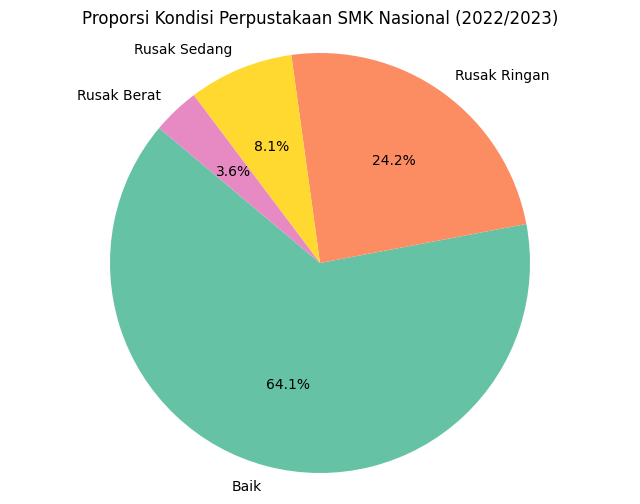

In [ ]:
import matplotlib.pyplot as plt
data = {
    'Baik': total_nasional['Baik Total'],
    'Rusak Ringan': total_nasional['Rusak Ringan Total'],
    'Rusak Sedang': total_nasional['Rusak Sedang Total'],
    'Rusak Berat': total_nasional['Rusak Berat Total']
}

plt.figure(figsize=(8, 6))
plt.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#ffd92f', '#e78ac3'])
plt.title('Proporsi Kondisi Perpustakaan SMK Nasional (2022/2023)')
plt.axis('equal')
plt.show()

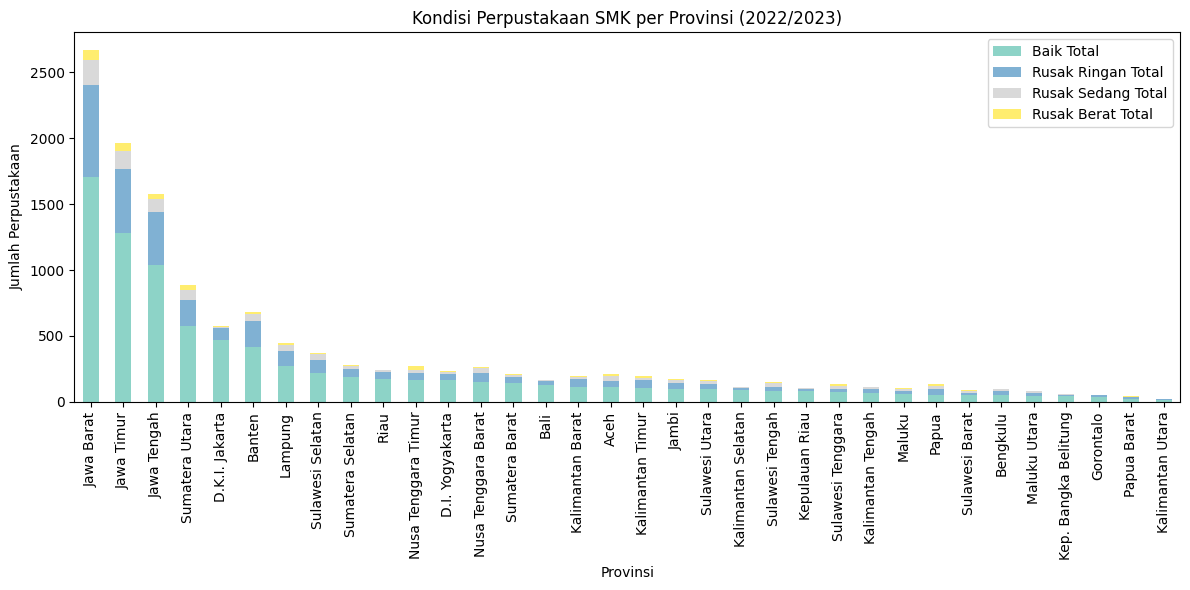

In [ ]:

grouped_prov.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Kondisi Perpustakaan SMK per Provinsi (2022/2023)')
plt.ylabel('Jumlah Perpustakaan')
plt.xlabel('Provinsi')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
prompt = f"""
Berikut adalah data kondisi perpustakaan SMK di Indonesia tahun ajaran 2022/2023:

- Jumlah perpustakaan dalam kondisi baik: {int(total_nasional['Baik Total'])}
- Jumlah perpustakaan rusak ringan: {int(total_nasional['Rusak Ringan Total'])}
- Jumlah perpustakaan rusak sedang: {int(total_nasional['Rusak Sedang Total'])}
- Jumlah perpustakaan rusak berat: {int(total_nasional['Rusak Berat Total'])}

Tolong berikan:
1. Insight utama dari pola ini
2. Analisis penyebab yang mungkin
"""

result = output.invoke(prompt)
print(result)


1. Insight Utama:

Data menunjukkan bahwa persentase perpustakaan yang dalam kondisi baik (8404) relatif besar dibandingkan dengan jumlah yang rusak (3174 + 1060 + 475 = 4639). Namun, masih ada potensi perbaikan, dengan lebih dari satu juta buku diperlukan penjagaan, terutama perpustakaan rusak yang sedang dan berat. Ini menunjukkan bahwa, secara umum, perpustakaan SMK di Indonesia berada dalam keadaan yang baik, tetapi memerlukan perhatian terhadap ketersediaan dan kesehatan buku-buku yang rusak.

2. Analisis Penyebab Mungkin:

a. Kekurangan dana dan sumber daya: Perpustakaan mungkin tidak memiliki dana cukup untuk melakukan pemrosesan dan pengelolaan rusak secara optimal. Hal ini dapat menyebabkan kumulasi buku-buku rusak diperbolehkan untuk menjadi lebih parah.

b. Kekurangan pelatihan dan kebijakan: Karyawan perpustakaan mungkin membutuhkan pelatihan lebih lanjut dalam cara mengidentifikasi, mengelola, dan memproses buku-buku rusak. Kekurangan kebijakan yang jelas tentang prosedur 

In [ ]:
prompt = f"""
Berikut adalah data kondisi perpustakaan SMK di Indonesia tahun ajaran 2022/2023:

- Jumlah perpustakaan dalam kondisi baik: {int(total_nasional['Baik Total'])}
- Jumlah perpustakaan rusak ringan: {int(total_nasional['Rusak Ringan Total'])}
- Jumlah perpustakaan rusak sedang: {int(total_nasional['Rusak Sedang Total'])}
- Jumlah perpustakaan rusak berat: {int(total_nasional['Rusak Berat Total'])}

Tolong berikan 3 rekomendasi kebijakan pendidikan yang dapat dilakukan untuk meningkatkan kualitas fasilitas perpustakaan SMK:
1. total 3 recomendasi tersebut maksimal 3000 karakter
2. Diberi judul yang jelas
3. isi rekomendasi harus jelas dan langsung kok pokok masalah
"""

result = output.invoke(prompt)
print(result)

**Titel: Strategi Pengembangan Fasilitas Perpustakaan SMK Indonesia (2022/2023)**

1. **Implementasi Program Intensif Pemulihan dan Pemeliharaan**: Dengan adanya 4129 buku rusak (ringan, sedang, dan berat), program pemulihan dan pemeliharaan perpustakaan harus dilaksanakan secara intensif. Pendidikan dan pelatihan bagi badan kelola perpustakaan dan tenaga ahli pemulihan buku dapat dilakukan untuk menciptakan kelangsungan sumber daya. Hal ini memastikan bahwa buku-buku rusak dapat diperbaiki dan kembali digunakan oleh pengguna perpustakaan.

2. **Mengoptimalkan Penggunaan Teknologi Informasi dan Komunikasi (TIK)**: Perpustakaan SMK harus menggunakan TIK untuk meningkatkan akses dan penggunaan sumber daya informasi. Implementasi sistem informasi perpustakaan digital, catat buku digital, dan koleksi e-book dapat membantu mengurangi jumlah buku rusak akibat kekurangan informasi atau keterlambatan dalam pengelolaan. Selain itu, pembinaan ruang studi TIK yang kemudian dilengkapi dengan akses